# Self Organizing Map (SOM) 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
dataset=iris.drop('species',axis=1)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cleandata=scaler.fit_transform(dataset)
cleanDataSet=pd.DataFrame(cleandata)
cleanDataSet.head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [11]:
!pip install minisom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11718 sha256=a03b18ba8150a86706c1f4e2f7b55f3b207eeaa79d378e6031ca7277191fd80b
  Stored in directory: c:\users\adeel\appdata\local\pip\cache\wheels\c8\29\ba\ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from minisom import MiniSom
from matplotlib.gridspec import GridSpec
som = MiniSom(7,7,4, sigma=0.25,neighborhood_function='gaussian')
#Controls the spread of the neighborhood function.
# A lower sigma makes the neighborhood influence smaller.
som.train_random(cleanDataSet.to_numpy(),30000)
#Specifies the number of iterations for training. 
# The higher this value, the more the SOM adjusts to the dataset


In [13]:
target = iris.species.astype('category').cat.codes
labels_map = som.labels_map(cleanDataSet.to_numpy(), target)
label_names = np.unique(target)

In [16]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

In [17]:
labels_map 

defaultdict(list,
            {(4, 1): Counter({0: 25}),
             (6, 6): Counter({0: 17}),
             (6, 3): Counter({0: 7}),
             (4, 6): Counter({0: 1}),
             (6, 0): Counter({1: 8}),
             (4, 4): Counter({1: 3}),
             (1, 0): Counter({1: 6}),
             (3, 0): Counter({1: 8, 2: 2}),
             (2, 2): Counter({1: 8}),
             (1, 6): Counter({1: 3}),
             (5, 4): Counter({1: 1}),
             (4, 5): Counter({1: 7}),
             (1, 1): Counter({1: 3, 2: 1}),
             (0, 0): Counter({1: 1, 2: 4}),
             (3, 4): Counter({1: 2, 2: 1}),
             (2, 6): Counter({2: 3}),
             (5, 5): Counter({2: 5}),
             (5, 3): Counter({2: 5}),
             (4, 0): Counter({2: 6}),
             (4, 2): Counter({2: 4}),
             (2, 3): Counter({2: 1}),
             (4, 3): Counter({2: 4}),
             (3, 5): Counter({2: 1}),
             (6, 4): Counter({2: 6}),
             (3, 6): Counter({2: 5}),
      

In [18]:
label_names

array([0, 1, 2], dtype=int8)

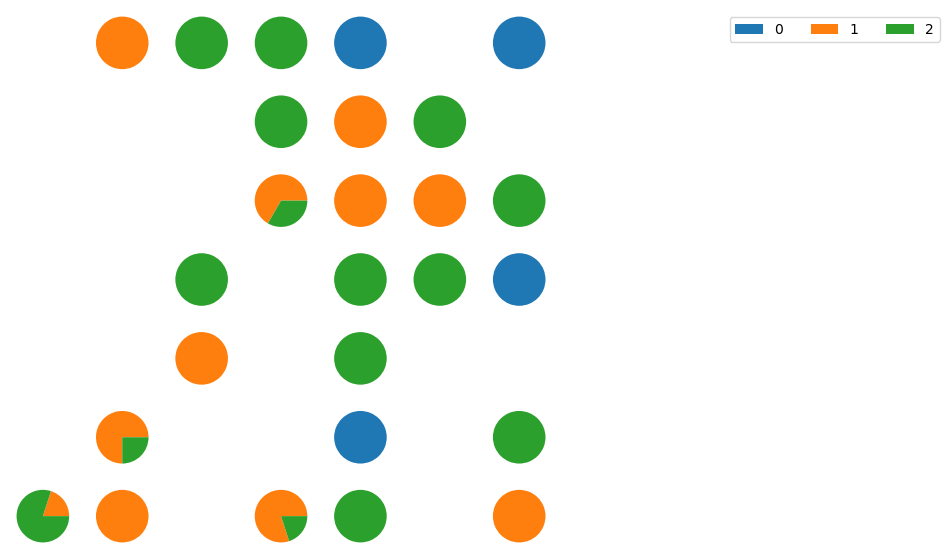

In [26]:
plt.figure(figsize=(7, 7))
the_grid = GridSpec(7, 7)

for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[6-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(7, 7), ncol=3)

plt.show()

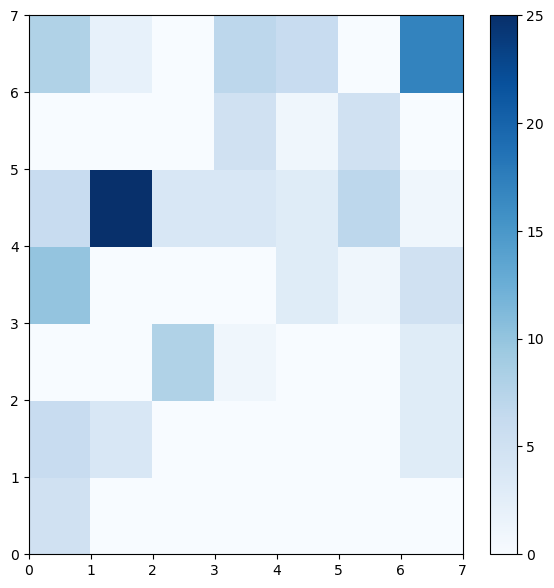

In [27]:
plt.figure(figsize=(7, 7))
frequencies = np.zeros((7, 7))
for position, values in som.win_map(cleanDataSet.to_numpy()).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()